In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [30]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

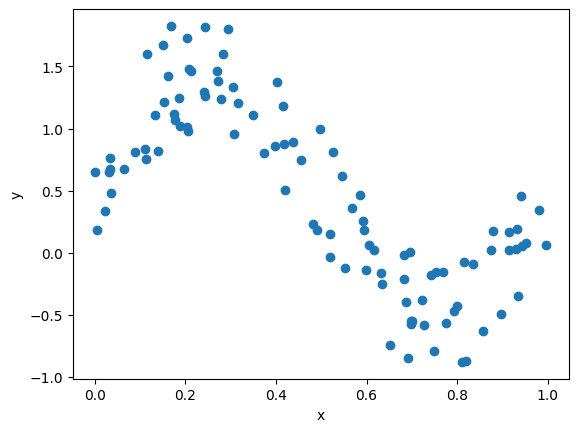

In [31]:
plt.scatter(x[:, 0], y[:, 0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [46]:
a = torch.linspace(-4, 4, 100000)  # 무작위 텐서

b = F.sigmoid(a)
c = F.relu(a)

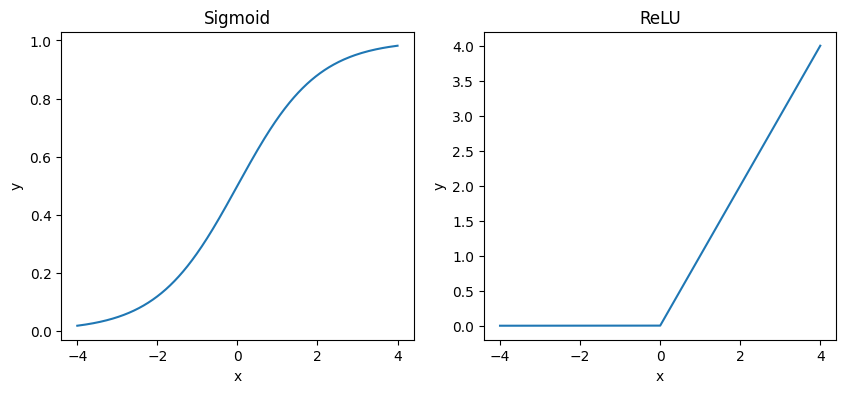

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(a, b)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Sigmoid')

axes[1].plot(a, c)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('ReLU')

plt.show()

In [33]:
class Model(nn.Module):
  def __init__(self, input_size=1, hidden_size=10, output_size=1):
    super().__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    y = self.linear1(x)
    y = F.sigmoid(y)
    y = self.linear2(y)
    return y

In [34]:
lr = 0.2
iters = 10000

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
  y_pred = model(x)
  loss = F.mse_loss(y, y_pred)

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if i % 1000 == 0:
    print(loss.item())

print(loss.item())

0.9632322788238525
0.23952196538448334
0.23782415688037872
0.23403015732765198
0.22124022245407104
0.1850355565547943
0.11827993392944336
0.08544430136680603
0.08229503035545349
0.08174017071723938
0.0814223363995552


In [23]:
x_ = torch.linspace(0, 1, 1000).unsqueeze(dim=1)
y_ = model(x_)

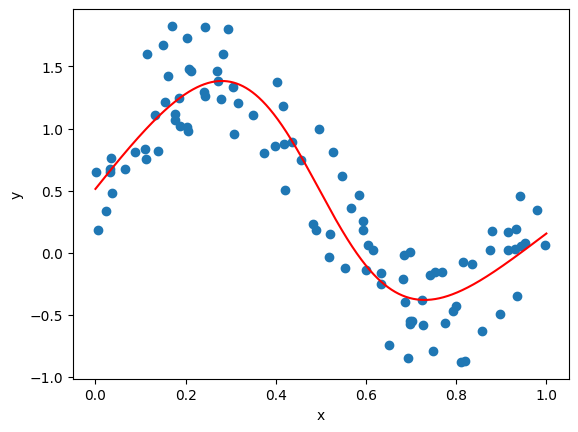

In [28]:
plt.scatter(x[:, 0], y[:, 0])
plt.plot(x_.detach().numpy(), y_.detach().numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()